# Notebook 1: (Demo) Registration with Visualization

Load and coregister mBq images from your directory, with some optional visualization steps.
Inputs:
- Directory of .tif iQID images, pixelated and activity-corrected (values in mBq)
- List of image indices (the order in which they appear) to discard (and replace)
- Various manipulable parameters for alignment process

Output:
- Stack of aligned mBq images (.tif stack) and preview image showing composite alignment

In [1]:
# Move the working directory up one level to the one shown to find the source packages.
# Feel free to modify your own system path to accomodate this package if desired.
# Please note this change for all relative paths contained in the notebook.

In [2]:
cd ..

C:\Users\Robin\Documents\Cal\iQID\git_iqid_alphas


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20
from pystackreg import StackReg

from importlib import reload
from iqid import align
reload(align)

<module 'iqid.align' from 'C:\\Users\\Robin\\Documents\\Cal\\iQID\\git_iqid_alphas\\iqid\\align.py'>

## Alignment and Registration (Time Point 1)

In [4]:
# Locate the set of .tif activity (mBq) images in your local directory.
imdir = 'data/H700/25March'
print('Looking for images at "{}"...'.format(imdir))
unreg = align.assemble_stack(imdir)
print('Images found. Starting coarse alignment...')

# Discard distorted images and align the rest.
exclude_list = np.array([0, 6])  # 0: inverted. 6: torn.
unreg_clean = align.ignore_images(unreg, exclude_list, pad=True)
rot = align.coarse_stack(unreg_clean, deg=2, avg_over=4)
print('Coarse rotation complete. Starting fine alignment...')

# Use pystackreg to perform rigid body or affine transform.
sr = StackReg(StackReg.RIGID_BODY)
tmat = sr.register_stack(rot, reference='previous', verbose=True)
reg = sr.transform_stack(rot)
reg = reg.clip(min=0)
print('Fine alignment complete.')

# Record the distortion (scaling and shear) if AFFINE used.
# shears, zooms = align.get_distortion_values(tmat)

Looking for images at "data/H700/25March"...
Images found. Starting coarse alignment...
Coarse rotation complete. Starting fine alignment...


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:01<00:00,  8.74it/s]


Fine alignment complete.


## Visualization: alignment and registration

Contrast enhanced for visualization

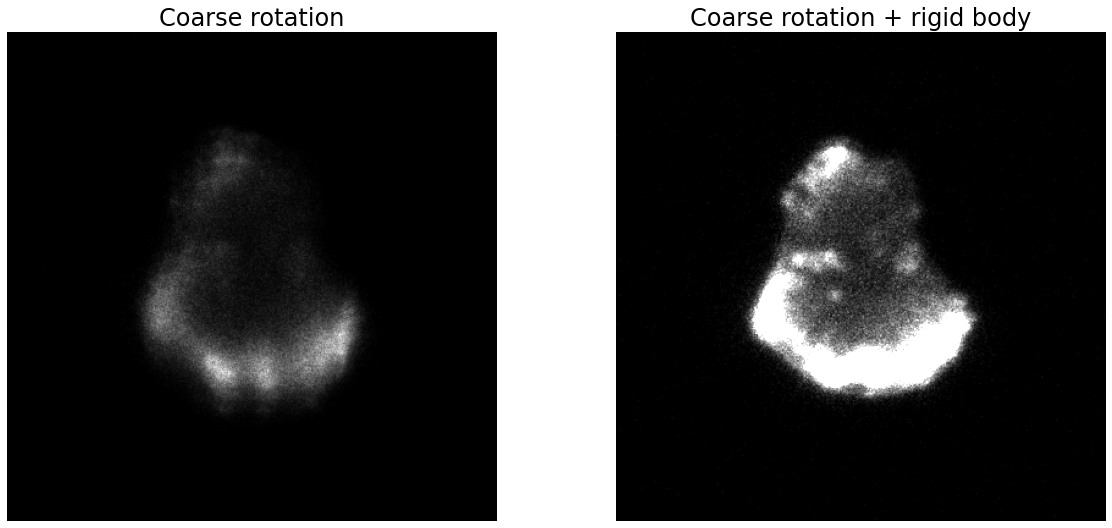

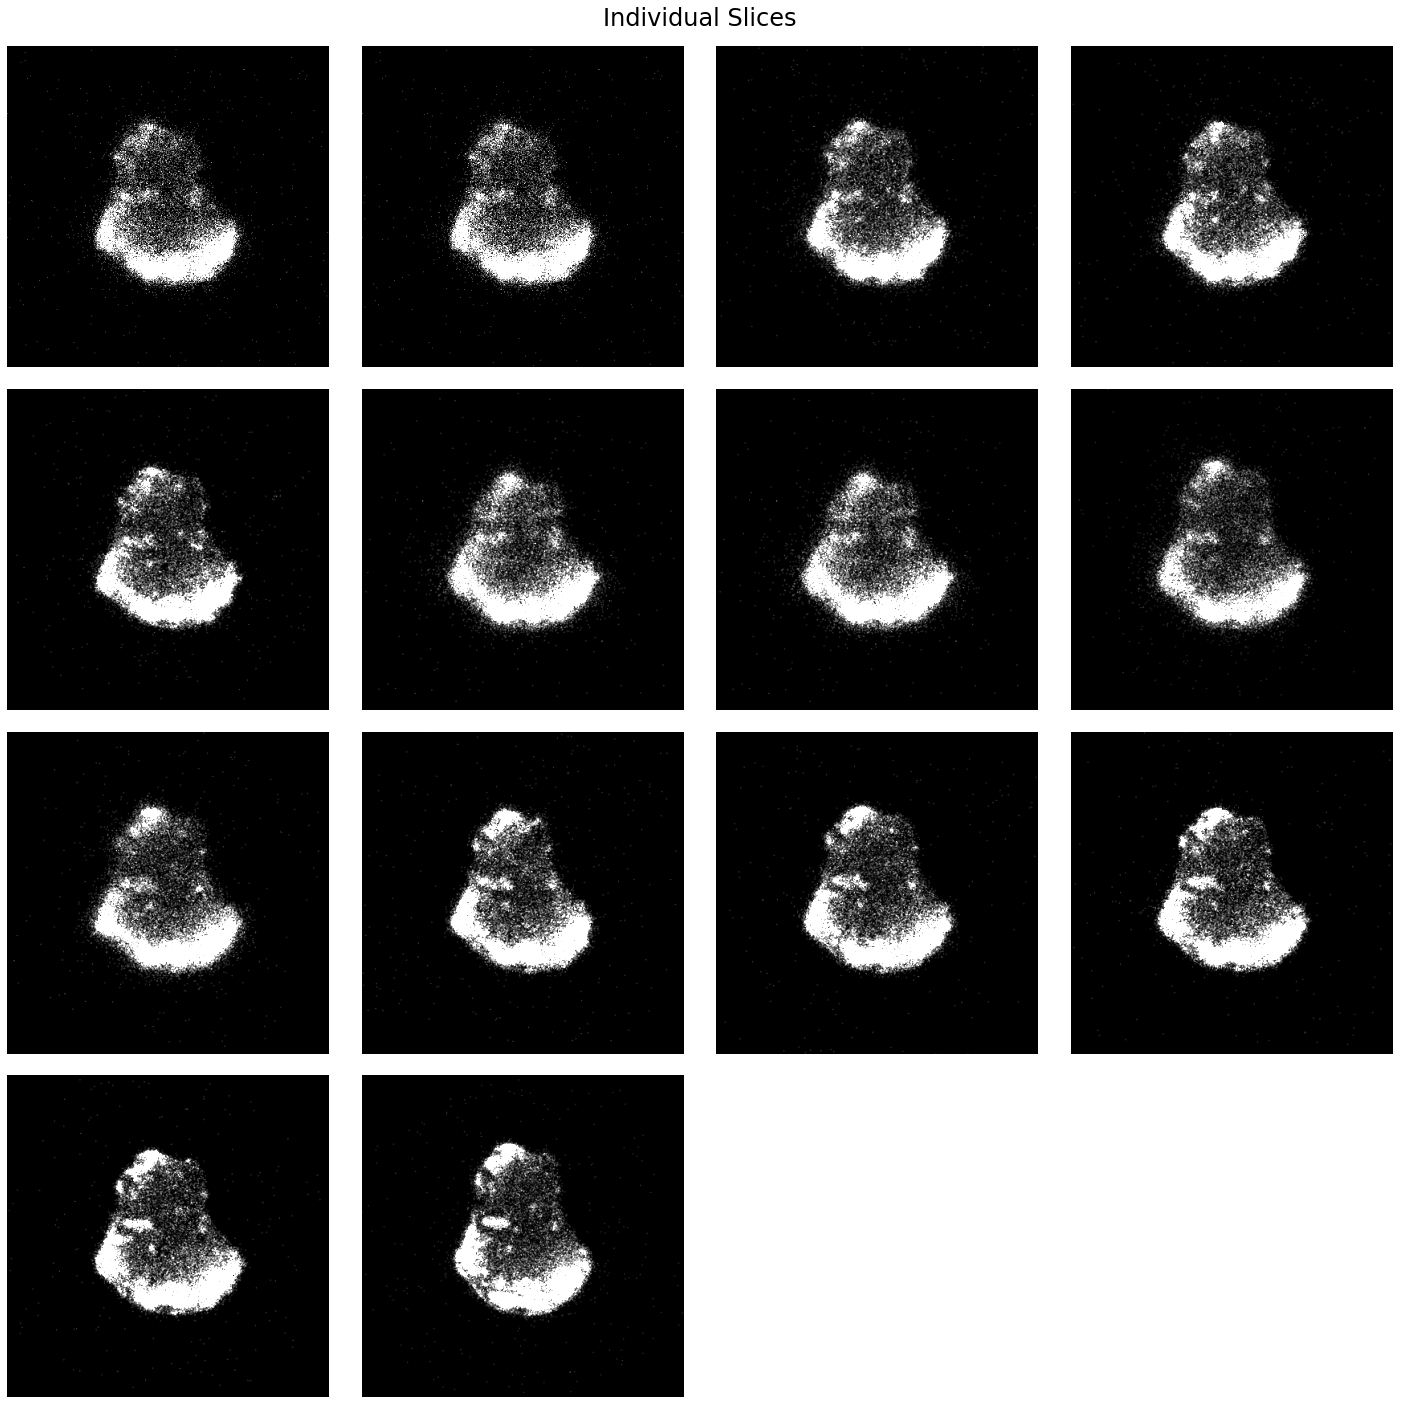

In [5]:
# Coarse and fine alignment
agg_rot = align.overlay_images(rot, aggregator=np.mean)
agg_aff = align.overlay_images(reg, aggregator=np.mean)

f, ax = plt.subplots(1, 2, figsize=(20, 9))

ax[0].imshow(agg_rot, cmap='gray')
ax[0].set_title('Coarse rotation')
ax[0].axis('off')

ax[1].imshow(agg_aff, cmap='gray', vmax=0.1)
ax[1].set_title('Coarse rotation + rigid body')
ax[1].axis('off')
plt.show()

# show all individual registered images
f, ax = plt.subplots(4,4, figsize=(20,20))
f.suptitle('Individual Slices')
axes = ax.ravel()
for i in range(len(reg)):
    axes[i].imshow(reg[i,:,:], cmap='gray', vmax=0.1)
for i in range(len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Example script to save registered images in a new subdirectory.
# One image stack with preserved data; one image for viewing (preview).

# newdir = os.path.join(imdir, 'aligned')
# Path(newdir).mkdir(parents=True, exist_ok=True)
# io.imsave(os.path.join(newdir, 'imstack.tif'), reg,
#         plugin='tifffile', photometric='minisblack')  # data
# im = Image.fromarray(align.overlay_images(reg, aggregator=np.mean))
# im.save(os.path.join(newdir, 'composite.tif'))  # for viewing
# print('Aligned images saved to {}'.format(newdir))

## Quantification of small-value distortions

In [7]:
# Quantification of small-value errors introduced by rigid body rotations.
pct_diff = (np.sum(reg)-np.sum(unreg_clean))/np.sum(unreg_clean)
print('Small-value errors result in summed activity difference of {:.2f}%.'.format(pct_diff*100))

Small-value errors result in summed activity difference of 0.38%.


## Time point 2

In [10]:
# Locate the set of .tif activity (mBq) images in your local directory.
imdir = 'data/H700/26March'
print('Looking for images at "{}"...'.format(imdir))
unreg = align.assemble_stack(imdir)
print('Images found. Starting coarse alignment...')

# Discard unwanted images and align the rest.
exclude_list = np.array([0, 4, 6])  # 0: inverted. 4: torn. 6: clipped.
unreg_clean = align.ignore_images(unreg, exclude_list, pad=True)
rot = align.coarse_stack(unreg_clean, deg=2, avg_over=5)
print('Coarse rotation complete. Starting fine alignment...')

# Use pystackreg to perform rigid body or affine transform.
sr = StackReg(StackReg.RIGID_BODY)
tmat = sr.register_stack(rot, reference='previous', verbose=True)
reg = sr.transform_stack(rot)
reg = reg.clip(min=0)
print('Fine alignment complete.')

Looking for images at "data/H700/26March"...
Images found. Starting coarse alignment...
Coarse rotation complete. Starting fine alignment...


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:01<00:00,  8.40it/s]


Fine alignment complete.


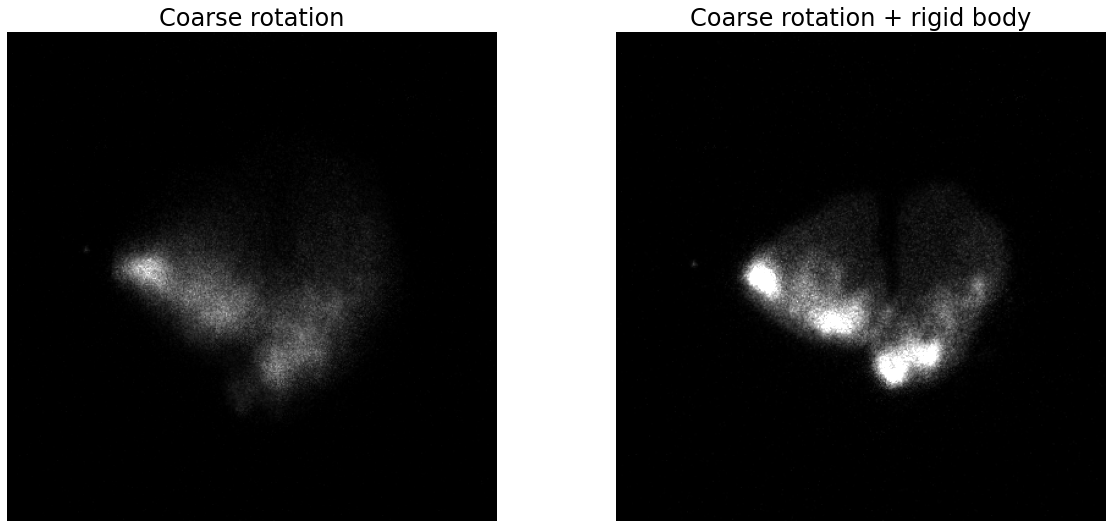

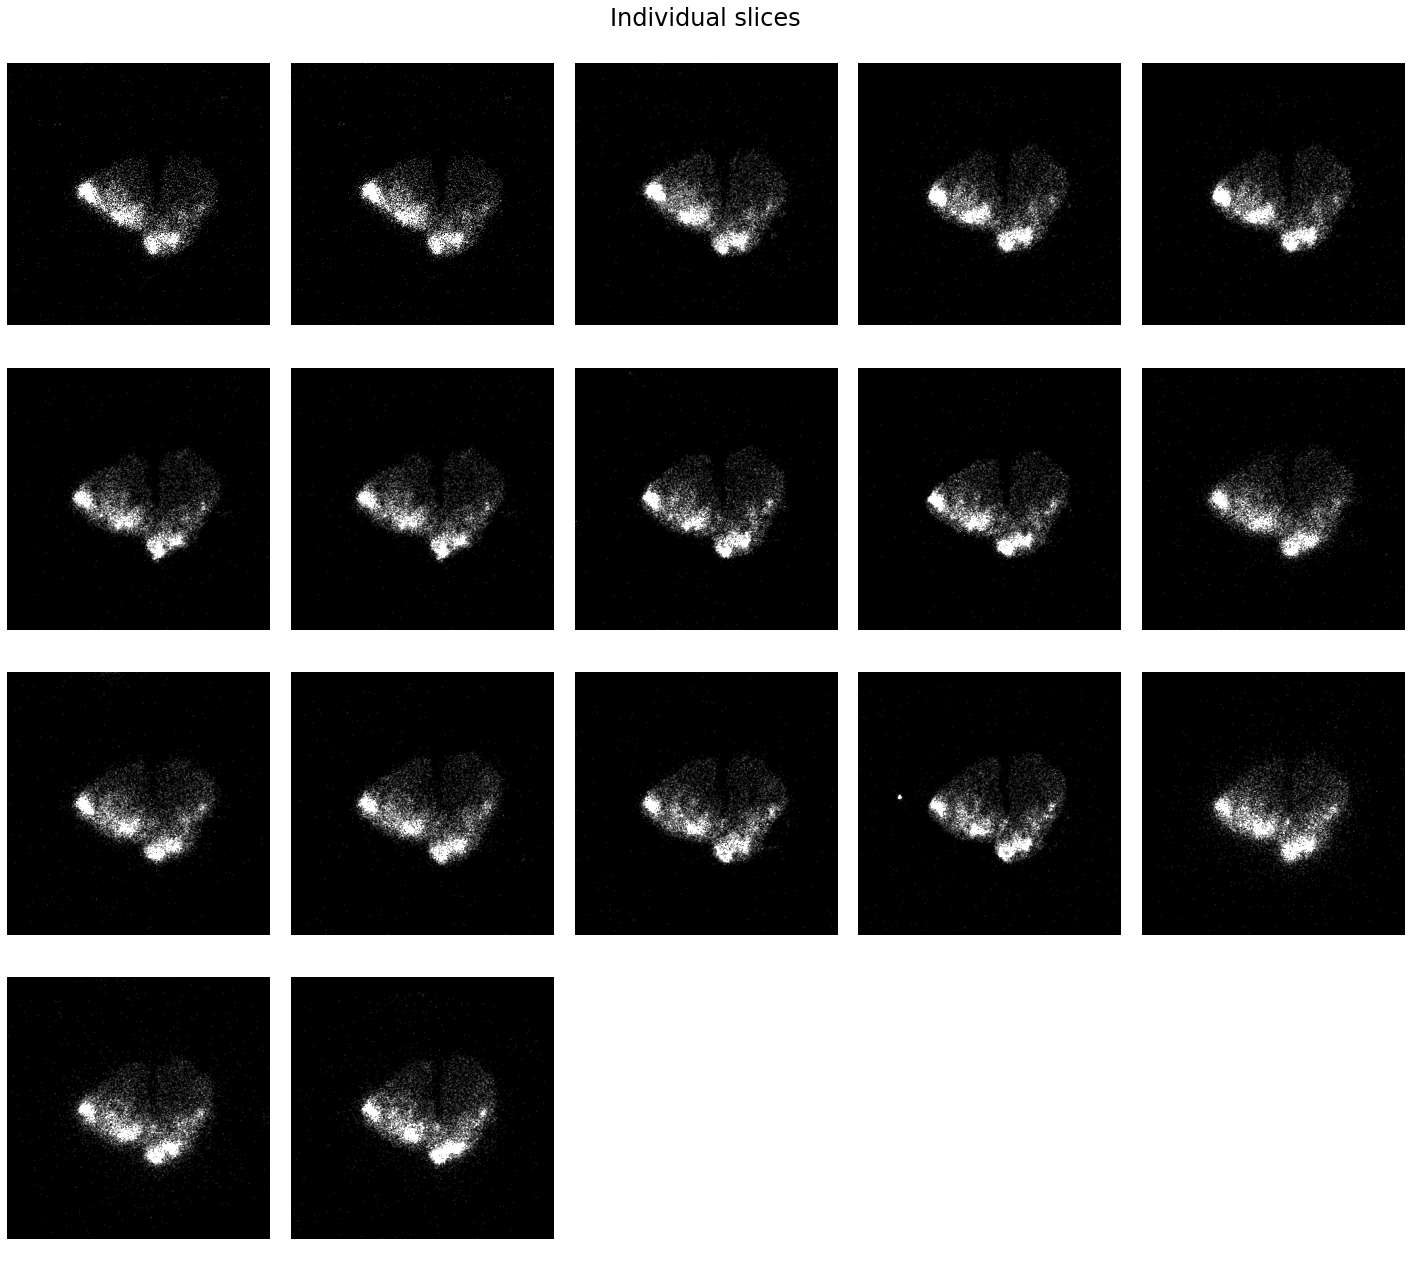

In [11]:
# Coarse and fine alignment
agg_rot = align.overlay_images(rot, aggregator=np.mean)
agg_aff = align.overlay_images(reg, aggregator=np.mean)

f, ax = plt.subplots(1, 2, figsize=(20, 9))

ax[0].imshow(agg_rot, cmap='gray')
ax[0].set_title('Coarse rotation')
ax[0].axis('off')

ax[1].imshow(agg_aff, cmap='gray', vmax=0.1)
ax[1].set_title('Coarse rotation + rigid body')
ax[1].axis('off')
plt.show()

# show all individual registered images
f, ax = plt.subplots(4,5, figsize=(20,18))
f.suptitle('Individual slices')
axes = ax.ravel()
for i in range(len(reg)):
    axes[i].imshow(reg[i,:,:], cmap='gray', vmax=0.1)
for i in range(len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [12]:
# Quantification of small-value errors introduced by rotations.
pct_diff = (np.sum(reg)-np.sum(unreg_clean))/np.sum(unreg_clean)
print('Small-value errors result in summed activity difference of {:.2f}%.'.format(pct_diff*100))

Small-value errors result in summed activity difference of 1.01%.
